<a href="https://colab.research.google.com/github/xiaochengJF/DeepLearning/blob/master/Course_4_Week_2_%E4%BD%9C%E4%B8%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install pydot
#!pip install graphviz

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
cd /content/gdrive/My Drive/DL-GPU/DeepLearning/Course 4 - Week 2 作业/

/content/gdrive/My Drive/DL-GPU/DeepLearning/Course 4 - Week 2 作业


In [0]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import kt_utils 

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [15]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = kt_utils.load_dataset()

# 归一化
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# 转置
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [0]:
# 使用Keras框架构建模型
def mode(imput_shape):
  """
  """
  # 定义一个tensor的placeholder，维度为input_shape
  X_input = Input(input_shape)
  
  # 使用0填充：X_input的周围填充0
  X = ZeroPadding2D((3, 3))(X_input)
  
  # 对X使用CONV-》BN-》RELU块
  X = Conv2D(32, (7, 7), stride = (1, 1), name = "conv0")(X) # ????????????????????????????????????????
  X = BatchNormalization(axis = 3, name = "bn0")(X)
  X = Activation('relu')(X)
  
  # 最大池化层
  X = MaxPooling2D((2, 2), name = "max_pool")(X)
  
  # 降维， 矩阵转化为向量+全连接层
  X = Flatten()(X)
  X = Dense(1, activation = 'sigmoid', name = "fc")(X)
  
  # 创建模型
  model = Model(imputs = X_input, outputs = X, name = 'HappyModel')
  
  return model

In [0]:
def HappyModel(input_shape):
    """
    实现一个检测笑容的模型

    参数：
        input_shape - 输入的数据的维度
    返回：
        model - 创建的Keras的模型

    """

    #你可以参考和上面的大纲
    X_input = Input(input_shape)

    #使用0填充：X_input的周围填充0
    X = ZeroPadding2D((3, 3))(X_input)

    #对X使用 CONV -> BN -> RELU 块
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    #最大值池化层
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    #降维，矩阵转化为向量 + 全连接层
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    #创建模型，讲话创建一个模型的实体，我们可以用它来训练、测试。
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model

In [18]:
#创建一个模型实体
happy_model = HappyModel(X_train.shape[1:])
#编译模型
happy_model.compile("adam","binary_crossentropy", metrics=['accuracy'])
#训练模型
#请注意，此操作会花费你大约6-10分钟。
happy_model.fit(X_train, Y_train, epochs=40, batch_size=50)
#评估模型
preds = happy_model.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
print ("误差值 = " + str(preds[0]))
print ("准确度 = " + str(preds[1]))

Epoch 1/40
600/600 [==============================] - 0s 723us/step - loss: 1.7791 - acc: 0.6200
Epoch 2/40
600/600 [==============================] - 0s 268us/step - loss: 0.3997 - acc: 0.8367
Epoch 3/40
600/600 [==============================] - 0s 223us/step - loss: 0.3297 - acc: 0.8450
Epoch 4/40
600/600 [==============================] - 0s 212us/step - loss: 0.2264 - acc: 0.8917
Epoch 5/40
600/600 [==============================] - 0s 211us/step - loss: 0.1382 - acc: 0.9533
Epoch 6/40
600/600 [==============================] - 0s 195us/step - loss: 0.1149 - acc: 0.9650
Epoch 7/40
600/600 [==============================] - 0s 197us/step - loss: 0.0808 - acc: 0.9700
Epoch 8/40
600/600 [==============================] - 0s 208us/step - loss: 0.0977 - acc: 0.9700
Epoch 9/40
600/600 [==============================] - 0s 200us/step - loss: 0.0629 - acc: 0.9833
Epoch 10/40
600/600 [==============================] - 0s 207us/step - loss: 0.0582 - acc: 0.9850
Epoch 11/40
600/600 [========

In [0]:
#网上随便找的图片，侵删
#img_path = 'images/smile.jpeg'
#
#img = image.load_img(img_path, target_size=(64, 64))
#imshow(img)
#
#x = image.img_to_array(img)
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
#
#print(happy_model.predict(x))


In [0]:
# 准确率太低可以调整
#X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
#X = BatchNormalization(axis = 3, name = 'bn0')(X)
#X = Activation('relu')(X)

In [20]:
happy_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
__________

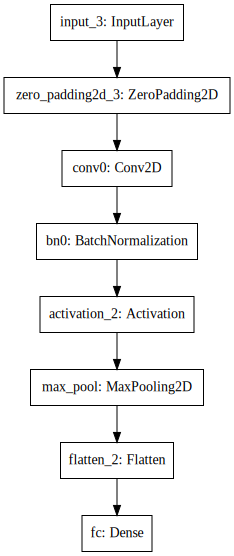

In [21]:
# 绘制布局图
%matplotlib inline
plot_model(happy_model, to_file = 'happy_model.png')
SVG(model_to_dot(happy_model).create(prog = 'dot', format = 'svg'))

In [22]:
import numpy as np
import tensorflow as tf

from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform

import pydot
from IPython.display import SVG
import scipy.misc
from matplotlib.pyplot import imshow
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

import resnets_utils 
import importlib
importlib.reload(resnets_utils)

<module 'resnets_utils' from '/content/gdrive/My Drive/DL-GPU/DeepLearning/Course 4 - Week 2 作业/resnets_utils.py'>

In [0]:
def identity_block(X, f, filters, stage, block):
    """
    实现图3的恒等块

    参数：
        X - 输入的tensor类型的数据，维度为( m, n_H_prev, n_W_prev, n_H_prev )
        f - 整数，指定主路径中间的CONV窗口的维度
        filters - 整数列表，定义了主路径每层的卷积层的过滤器数量
        stage - 整数，根据每层的位置来命名每一层，与block参数一起使用。
        block - 字符串，据每层的位置来命名每一层，与stage参数一起使用。

    返回：
        X - 恒等块的输出，tensor类型，维度为(n_H, n_W, n_C)

    """

    #定义命名规则
    conv_name_base = "res" + str(stage) + block + "_branch"
    bn_name_base   = "bn"  + str(stage) + block + "_branch"

    #获取过滤器
    F1, F2, F3 = filters

    #保存输入数据，将会用于为主路径添加捷径
    X_shortcut = X

    #主路径的第一部分
    ##卷积层
    X = Conv2D(filters=F1, kernel_size=(1,1), strides=(1,1) ,padding="valid",
               name=conv_name_base+"2a", kernel_initializer=glorot_uniform(seed=0))(X)
    ##归一化
    X = BatchNormalization(axis=3,name=bn_name_base+"2a")(X)
    ##使用ReLU激活函数
    X = Activation("relu")(X)

    #主路径的第二部分
    ##卷积层
    X = Conv2D(filters=F2, kernel_size=(f,f),strides=(1,1), padding="same",
               name=conv_name_base+"2b", kernel_initializer=glorot_uniform(seed=0))(X)
    ##归一化
    X = BatchNormalization(axis=3,name=bn_name_base+"2b")(X)
    ##使用ReLU激活函数
    X = Activation("relu")(X)


    #主路径的第三部分
    ##卷积层
    X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding="valid",
               name=conv_name_base+"2c", kernel_initializer=glorot_uniform(seed=0))(X)
    ##归一化
    X = BatchNormalization(axis=3,name=bn_name_base+"2c")(X)
    ##没有ReLU激活函数

    #最后一步：
    ##将捷径与输入加在一起
    X = Add()([X,X_shortcut])
    ##使用ReLU激活函数
    X = Activation("relu")(X)

    return X

In [0]:
#tf.reset_default_graph()
#with tf.Session() as test:
#    np.random.seed(1)
#    A_prev = tf.placeholder("float",[3,4,4,6])
#    X = np.random.randn(3,4,4,6)
#    A = identity_block(A_prev,f=2,filters=[2,4,6],stage=1,block="a")
#
#    test.run(tf.global_variables_initializer())
#    out = test.run([A],feed_dict={A_prev:X,K.learning_phase():0})
#    print("out = " + str(out[0][1][1][0]))
#
#    test.close()

In [0]:
def convolutional_block(X, f, filters, stage, block, s=2):
    """
    实现图5的卷积块

    参数：
        X - 输入的tensor类型的变量，维度为( m, n_H_prev, n_W_prev, n_C_prev)
        f - 整数，指定主路径中间的CONV窗口的维度
        filters - 整数列表，定义了主路径每层的卷积层的过滤器数量
        stage - 整数，根据每层的位置来命名每一层，与block参数一起使用。
        block - 字符串，据每层的位置来命名每一层，与stage参数一起使用。
        s - 整数，指定要使用的步幅

    返回：
        X - 卷积块的输出，tensor类型，维度为(n_H, n_W, n_C)
    """

    #定义命名规则
    conv_name_base = "res" + str(stage) + block + "_branch"
    bn_name_base   = "bn"  + str(stage) + block + "_branch"

    #获取过滤器数量
    F1, F2, F3 = filters

    #保存输入数据
    X_shortcut = X

    #主路径
    ##主路径第一部分
    X = Conv2D(filters=F1, kernel_size=(1,1), strides=(s,s), padding="valid",
               name=conv_name_base+"2a", kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+"2a")(X)
    X = Activation("relu")(X)

    ##主路径第二部分
    X = Conv2D(filters=F2, kernel_size=(f,f), strides=(1,1), padding="same",
               name=conv_name_base+"2b", kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+"2b")(X)
    X = Activation("relu")(X)

    ##主路径第三部分
    X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding="valid",
               name=conv_name_base+"2c", kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name=bn_name_base+"2c")(X)

    #捷径
    X_shortcut = Conv2D(filters=F3, kernel_size=(1,1), strides=(s,s), padding="valid",
               name=conv_name_base+"1", kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3,name=bn_name_base+"1")(X_shortcut)

    #最后一步
    X = Add()([X,X_shortcut])
    X = Activation("relu")(X)

    return X

In [0]:
#tf.reset_default_graph()
#
#with tf.Session() as test:
#    np.random.seed(1)
#    A_prev = tf.placeholder("float",[3,4,4,6])
#    X = np.random.randn(3,4,4,6)
#
#    A = convolutional_block(A_prev,f=2,filters=[2,4,6],stage=1,block="a")
#    test.run(tf.global_variables_initializer())
#
#    out = test.run([A],feed_dict={A_prev:X,K.learning_phase():0})
#    print("out = " + str(out[0][1][1][0]))
#
#    test.close()

In [0]:
def ResNet50(input_shape=(64,64,3),classes=6):
    """
    实现ResNet50
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    参数：
        input_shape - 图像数据集的维度
        classes - 整数，分类数

    返回：
        model - Keras框架的模型

    """

    #定义tensor类型的输入数据
    X_input = Input(input_shape)

    #0填充
    X = ZeroPadding2D((3,3))(X_input)

    #stage1
    X = Conv2D(filters=64, kernel_size=(7,7), strides=(2,2), name="conv1",
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name="bn_conv1")(X)
    X = Activation("relu")(X)
    X = MaxPooling2D(pool_size=(3,3), strides=(2,2))(X)

    #stage2
    X = convolutional_block(X, f=3, filters=[64,64,256], stage=2, block="a", s=1)
    X = identity_block(X, f=3, filters=[64,64,256], stage=2, block="b")
    X = identity_block(X, f=3, filters=[64,64,256], stage=2, block="c")

    #stage3
    X = convolutional_block(X, f=3, filters=[128,128,512], stage=3, block="a", s=2)
    X = identity_block(X, f=3, filters=[128,128,512], stage=3, block="b")
    X = identity_block(X, f=3, filters=[128,128,512], stage=3, block="c")
    X = identity_block(X, f=3, filters=[128,128,512], stage=3, block="d")

    #stage4
    X = convolutional_block(X, f=3, filters=[256,256,1024], stage=4, block="a", s=2)
    X = identity_block(X, f=3, filters=[256,256,1024], stage=4, block="b")
    X = identity_block(X, f=3, filters=[256,256,1024], stage=4, block="c")
    X = identity_block(X, f=3, filters=[256,256,1024], stage=4, block="d")
    X = identity_block(X, f=3, filters=[256,256,1024], stage=4, block="e")
    X = identity_block(X, f=3, filters=[256,256,1024], stage=4, block="f")

    #stage5
    X = convolutional_block(X, f=3, filters=[512,512,2048], stage=5, block="a", s=2)
    X = identity_block(X, f=3, filters=[512,512,2048], stage=5, block="b")
    X = identity_block(X, f=3, filters=[512,512,2048], stage=5, block="c")

    #均值池化层
    X = AveragePooling2D(pool_size=(2,2),padding="same")(X)

    #输出层
    X = Flatten()(X)
    X = Dense(classes, activation="softmax", name="fc"+str(classes),
              kernel_initializer=glorot_uniform(seed=0))(X)


    #创建模型
    model = Model(inputs=X_input, outputs=X, name="ResNet50")

    return model

In [0]:
model = ResNet50(input_shape=(64,64,3),classes=6)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [29]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = resnets_utils.load_dataset()

# Normalize image vectors
X_train = X_train_orig / 255.
X_test = X_test_orig / 255.

# Convert training and test labels to one hot matrices
Y_train = resnets_utils.convert_to_one_hot(Y_train_orig, 6).T
Y_test = resnets_utils.convert_to_one_hot(Y_test_orig, 6).T

print("number of training examples = " + str(X_train.shape[0]))
print("number of test examples = " + str(X_test.shape[0]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [33]:
model.fit(X_train,Y_train,epochs=20,batch_size=32)

Epoch 1/20
1080/1080 [==============================] - 3s 3ms/step - loss: 0.8116 - acc: 0.7343
Epoch 2/20
1080/1080 [==============================] - 3s 3ms/step - loss: 0.3888 - acc: 0.8815
Epoch 3/20
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2096 - acc: 0.9296
Epoch 4/20
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2011 - acc: 0.9370
Epoch 5/20
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2929 - acc: 0.9019
Epoch 6/20
1080/1080 [==============================] - 3s 3ms/step - loss: 0.6018 - acc: 0.8204
Epoch 7/20
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2740 - acc: 0.9204
Epoch 8/20
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1400 - acc: 0.9491
Epoch 9/20
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1280 - acc: 0.9602
Epoch 10/20
1080/1080 [==============================] - 3s 3ms/step - loss: 0.3630 - acc: 0.8991
Epoch 11/20
1080/1080 [======

In [34]:
preds = model.evaluate(X_test,Y_test)

print("误差值 = " + str(preds[0]))
print("准确率 = " + str(preds[1]))

120/120 [==============================] - 0s 942us/step
误差值 = 0.18069784740606945
准确率 = 0.9666666626930237


In [0]:
#　测试
#from PIL import Image
#import numpy as np
#import matplotlib.pyplot as plt # plt 用于显示图片
#
#%matplotlib inline
#
#img_path = 'images/3.png'
#
#my_image = image.load_img(img_path, target_size=(64, 64))
#my_image = image.img_to_array(my_image)
#
#my_image = np.expand_dims(my_image,axis=0)
#my_image = preprocess_input(my_image)
#
#print("my_image.shape = " + str(my_image.shape))
#
#print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ")
#print(model.predict(my_image))
#
#my_image = scipy.misc.imread(img_path)
#plt.imshow(my_image)
